In [6]:
#imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

[0.13137437 0.52584038 0.39225126 0.81064218 0.09009424 0.7565908
 0.78634554 0.41964396 0.38943827 0.21600226]


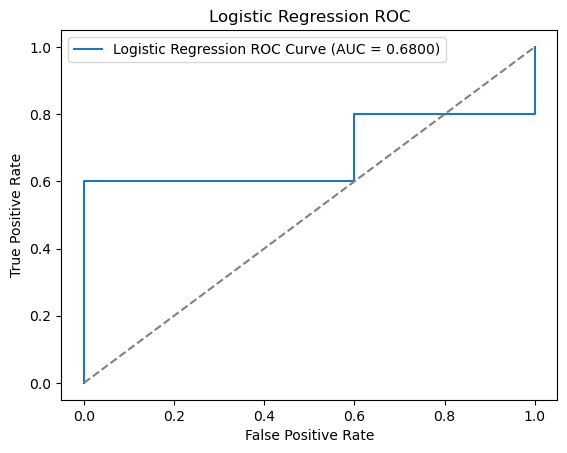

Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.75      0.60      0.67         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10

ROC AUC Score: 0.68


In [7]:
#np.random.seed(42)
#get data
Reg_data = pd.read_csv("./filtereddatasets/merged_finalists_regular.csv")
Play_data = pd.read_csv("./filtereddatasets/merged_finalists_playoffs.csv")
#select features
features = [
	"W_PCT", "FG3M_RANK", "FG3A_RANK", "FG3_PCT", "PLUS_MINUS", "NET_RATING", "PACE", "TS_PCT", "EFG_PCT_x",
	"AST_RATIO", "OREB_PCT_x", "DREB_PCT", "REB_PCT", "TM_TOV_PCT_x", "PTS_OFF_TOV", "PTS_2ND_CHANCE", "PTS_FB",
	"PTS_PAINT", "OPP_PTS_OFF_TOV", "OPP_PTS_2ND_CHANCE", "OPP_PTS_FB", "OPP_PTS_PAINT", "FTA_RATE", "EFG_PCT_y",
	"OREB_PCT_y", "TM_TOV_PCT_y"
]
reg_X = Reg_data[features]
reg_Y = Reg_data["WON_FINALS"]
reg_X = reg_X.loc[reg_Y.index]
#create train test split
X_train, X_test, Y_train, Y_test = train_test_split(reg_X, reg_Y, test_size = 0.2, stratify = reg_Y)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = model.predict(X_test)
Y_proba = model.predict_proba(X_test)[:, 1]
print(Y_proba)
score = roc_auc_score(Y_test, Y_proba)

#roc and auc
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, Y_proba)
#plot ROC with AUC
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f"Logistic Regression ROC Curve (AUC = {score:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC")
plt.legend()
plt.show()

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))
print("ROC AUC Score:", roc_auc_score(Y_test, Y_proba))
